In [5]:
import pickle
import glob
import networkx as nx 
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

to_classify = ["sample", "domain", "phylum", "class", "order", "family", "genus"]

disease1 = "ibd"
disease2 = "crc"
classifier = 'family'

files1 = glob.glob('results/'+disease1+'/'+disease1+'_dicts2/*')
files2 = glob.glob('results/'+disease2+'/'+disease2+'_dicts/*')

# calculating beta diversity

In [6]:
# calculate thresholds

# find average value of each
total_organisms1 = {}
total_organisms2 = {}

for file in files1:
    with open(file, 'rb') as f:
        taxa_dict = pickle.load(f)
    
    # count total taxa
    for i in taxa_dict[classifier]:
        if i not in total_organisms1:
            total_organisms1[i] = taxa_dict[classifier][i]
        else:
            total_organisms1[i] += taxa_dict[classifier][i]


for file in files2:
    with open(file, 'rb') as f:
        taxa_dict = pickle.load(f)
    
    # count total taxa
    for i in taxa_dict[classifier]:
        if i not in total_organisms2:
            total_organisms2[i] = taxa_dict[classifier][i]
        else:
            total_organisms2[i] += taxa_dict[classifier][i]

In [7]:
# bray curtis, jaccard

sum = 0
total = 0
sum_max = 0

for i in total_organisms1:
    if i in total_organisms2:
        sum += min(total_organisms1[i], total_organisms2[i])
        total += total_organisms1[i]
        total += total_organisms2[i]

        sum_max += max(total_organisms1[i], total_organisms2[i])

print("Bray curtis distance between " + disease1 + " and " + disease2 + ":", 1 - (sum / total))
print("Jaccard curtis distance between " + disease1 + " and " + disease2 + ":", 1 - (sum / sum_max))

Bray curtis distance between ibd and crc: 0.9186543965713052
Jaccard curtis distance between ibd and crc: 0.9114513534879917


In [8]:
# make heatmap

bray_curtis = {"IBS" : {"IBS": 1.0, "IBD" : 0.922822745798175, "CRC": 0.7703956393492486}, "IBD" : {"IBS": 0.922822745798175, "IBD" : 1.0, "CRC": 0.9186543965713052}, "CRC" : {"IBS": 0.7703956393492486, "IBD" : 0.9186543965713052, "CRC": 1.0}}
jaccard = {"IBS" : {"IBS": 1.0, "IBD" : 0.9163682792245523, "CRC": 0.7019656538493679}, "IBD" : {"IBS": 0.9163682792245523, "IBD" : 1.0, "CRC": 0.9114513534879917}, "CRC" : {"IBS": 0.7019656538493679, "IBD" : 0.9114513534879917, "CRC": 1.0}}

Text(0.5, 1.0, 'Beta diversity (Bray-Curtis, family)')

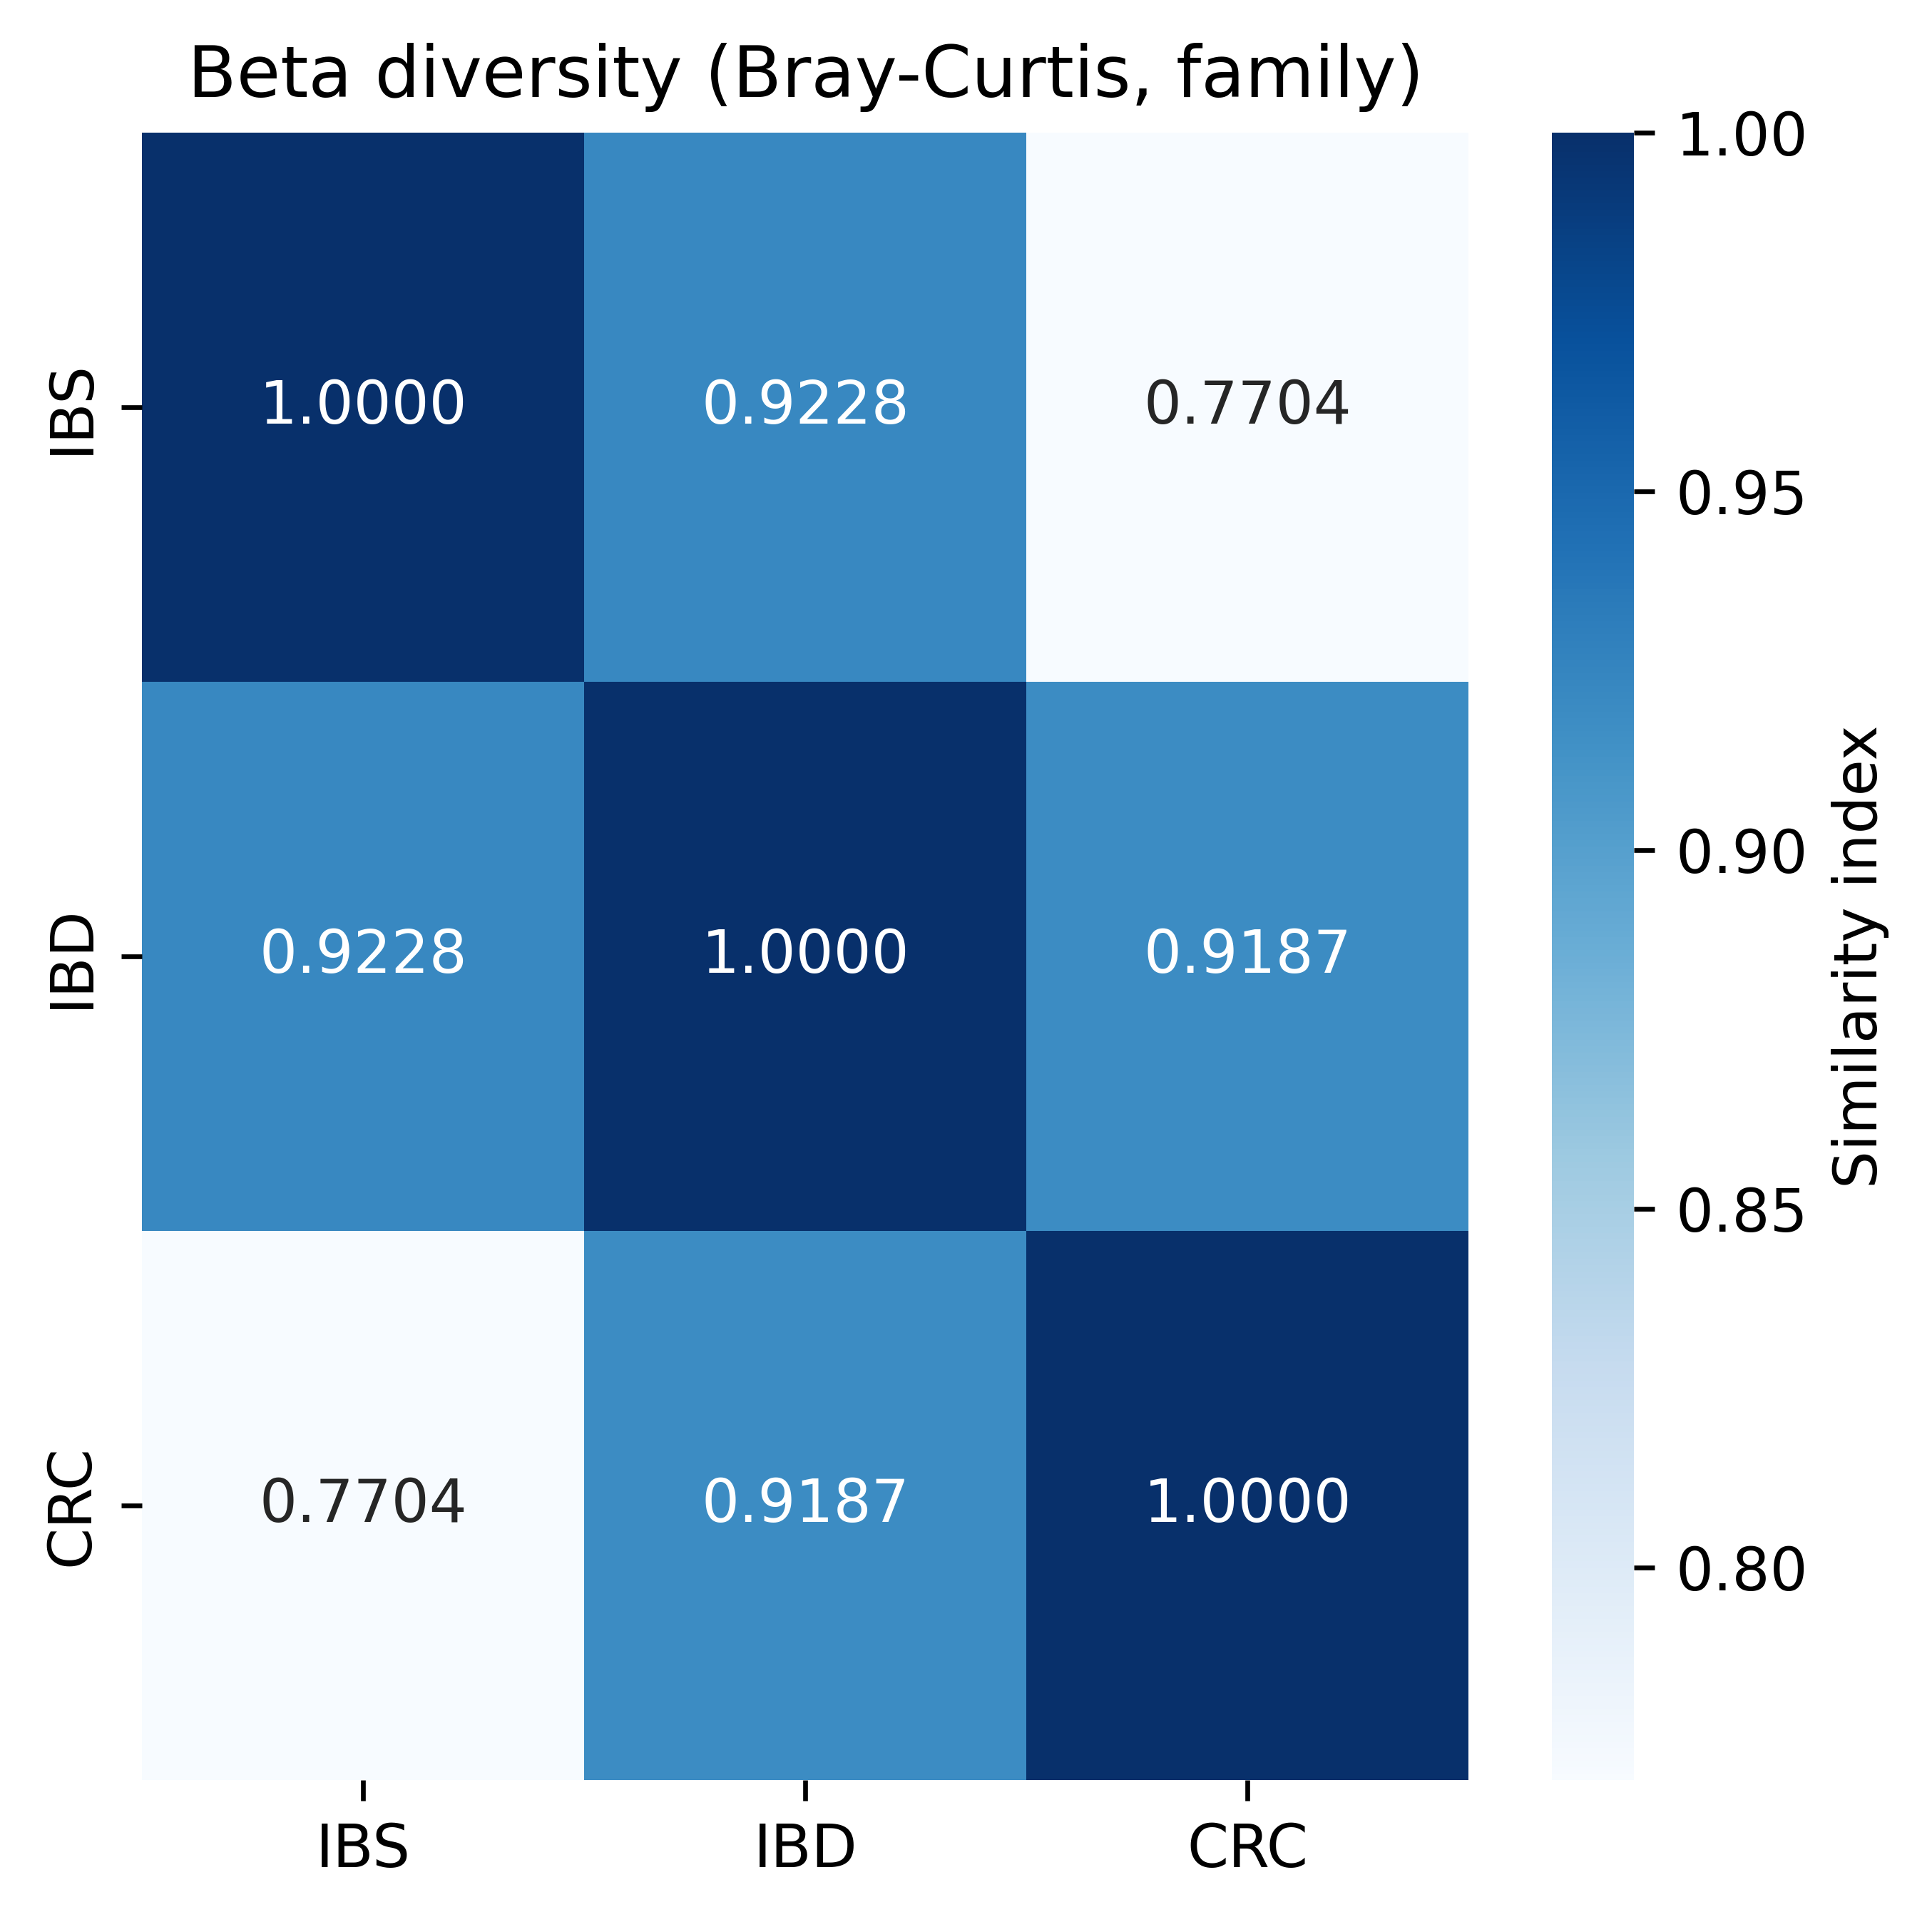

In [12]:
df = pd.DataFrame.from_dict(bray_curtis, orient='index')

plt.figure(figsize=(5, 5), dpi=600)
coloring = sns.color_palette("Blues", as_cmap=True)
# coloring.set_bad("#E3D8C1")
heatmap = sns.heatmap(df, annot = True, cmap = coloring, cbar_kws={'label': 'Similarity index'}, fmt='.4f')
heatmap.set_title("Beta diversity (Bray-Curtis, "+classifier+")")

Text(0.5, 1.0, 'Beta diversity (Jaccard, family)')

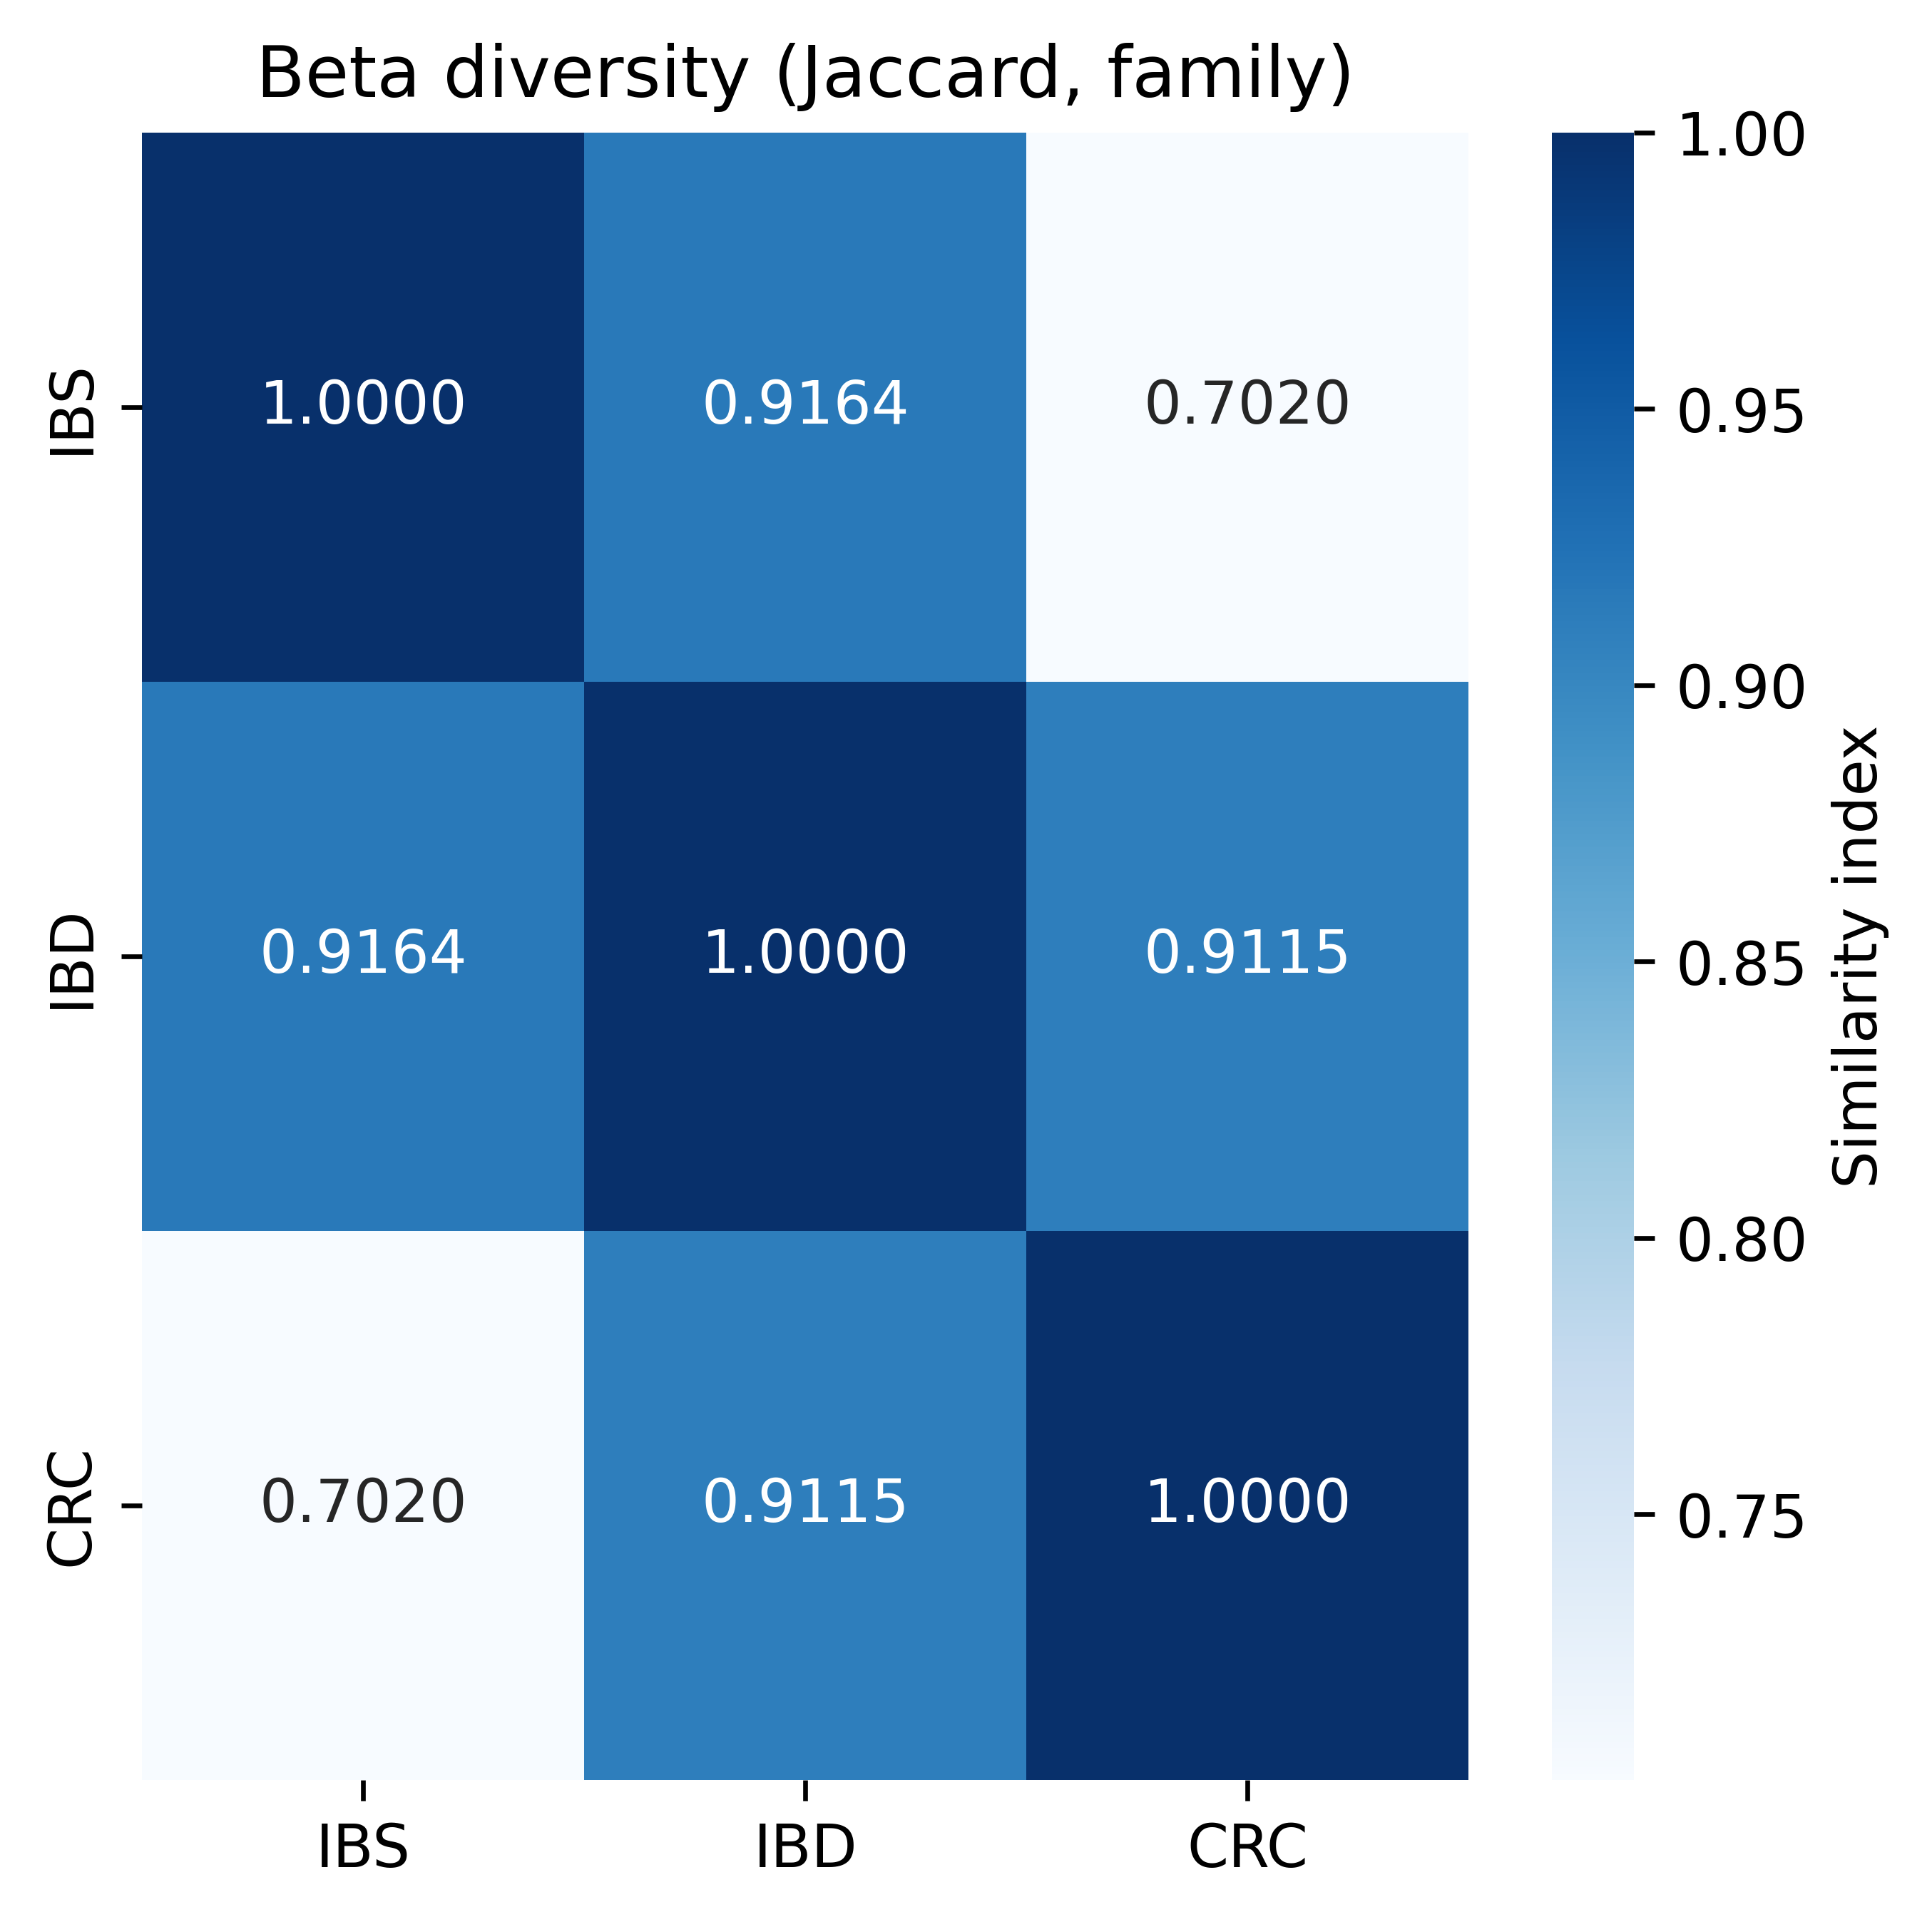

In [11]:
df = pd.DataFrame.from_dict(jaccard, orient='index')

plt.figure(figsize=(5, 5), dpi=600)
coloring = sns.color_palette("Blues", as_cmap=True)
# coloring.set_bad("#E3D8C1")
heatmap = sns.heatmap(df, annot = True, cmap = coloring, cbar_kws={'label': 'Similarity index'}, fmt='.4f')
heatmap.set_title("Beta diversity (Jaccard, "+classifier+")")